# Dataset Loading

In [1]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset with the top 10,000 most frequent words
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
print(f"Sample review (encoded): {X_train[0]}")
print(f"Label: {y_train[0]}")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")

Sample review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1
Number of training samples

# Data Exploration


Review Lengths:
Min length: 11
Max length: 2494
Average length: 238.71


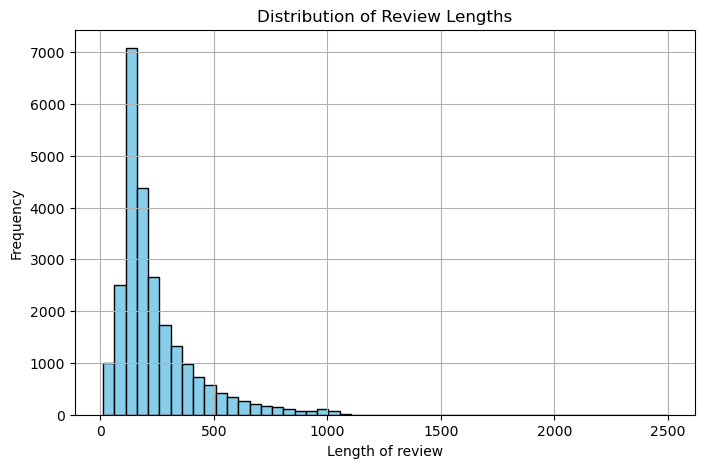

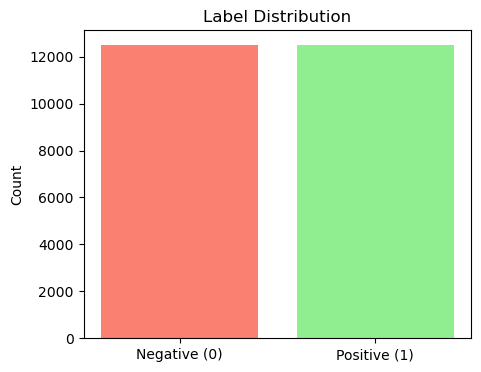


Label counts (train):
Negative (0): 12500
Positive (1): 12500


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

# Load IMDB dataset
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# --------------------------------------------
# 1. Review length statistics
# --------------------------------------------
review_lengths = [len(x) for x in X_train]
print(f"\nReview Lengths:")
print(f"Min length: {np.min(review_lengths)}")
print(f"Max length: {np.max(review_lengths)}")
print(f"Average length: {np.mean(review_lengths):.2f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of review")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# --------------------------------------------
# 2. Label distribution
# --------------------------------------------
labels, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(5, 4))
plt.bar(['Negative (0)', 'Positive (1)'], counts, color=['salmon', 'lightgreen'])
plt.title("Label Distribution")
plt.ylabel("Count")
plt.show()

print("\nLabel counts (train):")
print(f"Negative (0): {counts[0]}")
print(f"Positive (1): {counts[1]}")


# Text Preprocessing

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 200  # Limit review length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [5]:
# Load word index and build reverse mapping
word_index = imdb.get_word_index()
index_to_word = {index+3: word for word, index in word_index.items()}
index_to_word[0] = '<PAD>'
index_to_word[1] = '<START>'
index_to_word[2] = '<UNK>'
index_to_word[3] = '<UNUSED>'

# Decode function
def decode_review(encoded_review):
    return ' '.join([index_to_word.get(i, '?') for i in encoded_review])

#Place the decoding loop here
for i in range(3):
    print(f"\nReview {i}:\n{decode_review(X_train[i])}")


Review 0:
and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after a

# LSTM Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Define model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128),  # word embeddings
    Bidirectional(LSTM(128, return_sequences=False)),  # Bi-LSTM
    Dropout(0.5),  # regularization
    Dense(1, activation='sigmoid')  # binary output
])

# Build model to show summary
model.build(input_shape=(None, maxlen))

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,543,425 (5.89 MB)

 Trainable params: 1,543,425 (5.89 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 448ms/step - accuracy: 0.6766 - loss: 0.5631 - val_accuracy: 0.7560 - val_loss: 0.5033
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 154s 492ms/step - accuracy: 0.8841 - loss: 0.2939 - val_accuracy: 0.8554 - val_loss: 0.3342
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 155s 495ms/step - accuracy: 0.9290 - loss: 0.1912 - val_accuracy: 0.8590 - val_loss: 0.3388
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 158s 504ms/step - accuracy: 0.9491 - loss: 0.1451 - val_accuracy: 0.8604 - val_loss: 0.3724
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 170s 544ms/step - accuracy: 0.9634 - loss: 0.1071 - val_accuracy: 0.8678 - val_loss: 0.3818


# Validating on test dataset

In [8]:
score, acc = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(acc * 100))

782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.8587 - loss: 0.4071
Test Accuracy: 86.06%


#  Evaluate of Model

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype("int")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step
Accuracy: 0.8606
Precision: 0.8689530981419333
Recall: 0.84928
F1 Score: 0.8590039244244851


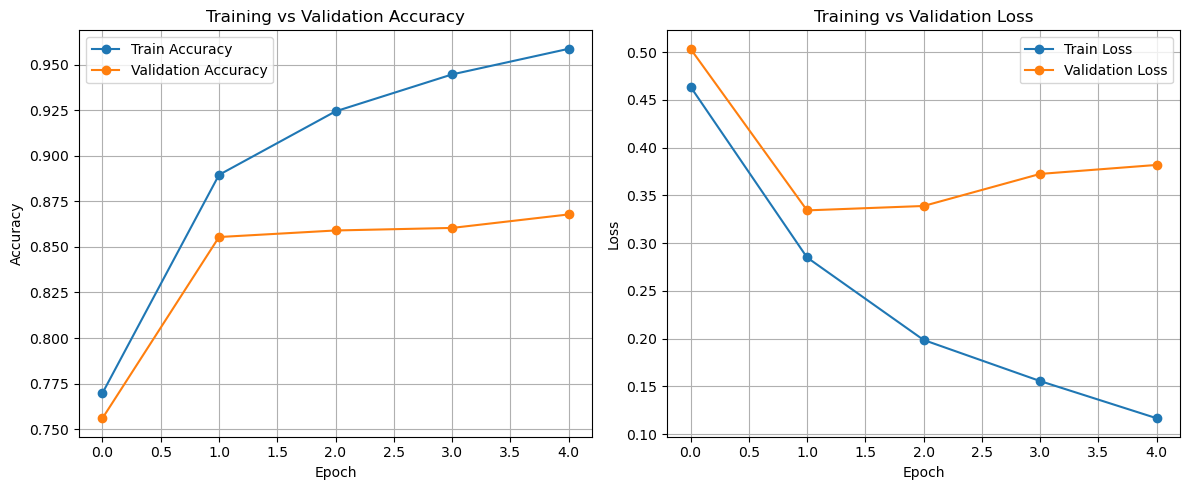

In [10]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import re

def preprocess_input(text):
    word_idx = imdb.get_word_index()
    text = re.sub(r"[^\w\s]", "", text.lower())  # Remove punctuation
    words = text.split()
    encoded = [1]  # Start token
    for word in words:
        index = word_idx.get(word, 2)  # Unknown token = 2
        if index < num_words:
            encoded.append(index)
    return pad_sequences([encoded], maxlen=maxlen)


# Predictions

In [12]:
# Custom review
review = "The movie was absolutely wonderful with great acting"
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Sentiment: Positive


In [13]:
# Custom review
review = 'This Movie was not that good'
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Sentiment: Negative


In [15]:
# Custom review
review ="Good Movie"
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Sentiment: Positive


In [16]:
# Custom review
review ="Not a good movie!"
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Sentiment: Negative


In [17]:
# Custom review
review ="This movie was ok but not that good."
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Sentiment: Negative


In [19]:
# Custom review
review ="This movie is fantastic! I really like it because it is so good!"
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Sentiment: Positive


In [20]:
# Custom review
review ="The movie was really good and I enjoyed it"
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Sentiment: Positive


In [22]:
# Custom review
review ="The movie sucks. I hate this movie"
processed = preprocess_input(review)
prediction = model.predict(processed)[0][0]
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Sentiment: Negative
